#Data Cleaning and Preprocessing - Titanic Dataset
covers the process to clean and prepare raw data for ML using Python, Pandas, and Scikit-Learn

In [1]:
#import libraries that are necessary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step1 : Import the dataset and explore basic info

In [2]:
# load dataset
from google.colab import drive
drive.mount('/content/drive')
file_path= '/content/drive/MyDrive/ML_datasets/Titanic-Dataset.csv'
df= pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#get dataset's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# To find number of missing values for each column
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
# to find the percentage of missing values
missing_value_percentage= df.isnull().mean()*100
print(missing_value_percentage.round(2))

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


In [6]:
# since the columns 'Age', 'Cabin' and 'Embarked' has missing values ,  we handle these columns

In [7]:
#for 'Age'
df['Age']=df['Age'].fillna(df['Age'].median())

In [8]:
#for 'Embarked'
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [9]:
# for 'Cabin' ,  It contains about 77% missing values , dropping it as it has too many missing values to be considered useful
# Drop the 'Cabin' column
df = df.drop('Cabin', axis=1)

Step3: Convert Categorical features into numerical using encoding


In [10]:
#Categorical columns are 'Sex' and 'Embarked'
# Use Label Encoding for 'Sex'
from sklearn.preprocessing import LabelEncoder, StandardScaler
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male = 1, female = 0

# One-hot encode 'Embarked' and convert the boolean values to int (1/0)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df[['Embarked_Q', 'Embarked_S']] = df[['Embarked_Q', 'Embarked_S']].astype(int)

Step4: Normalize/Standardize the numerical features

In [11]:
# Select numerical columns to scale
num_cols = ['Age', 'Fare']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.663861,1,0,PC 17599,0.786845,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,0,1


Step5: Visualize outliers using boxplots and remove them

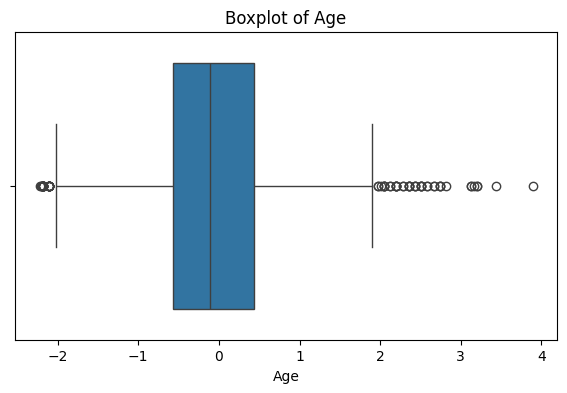

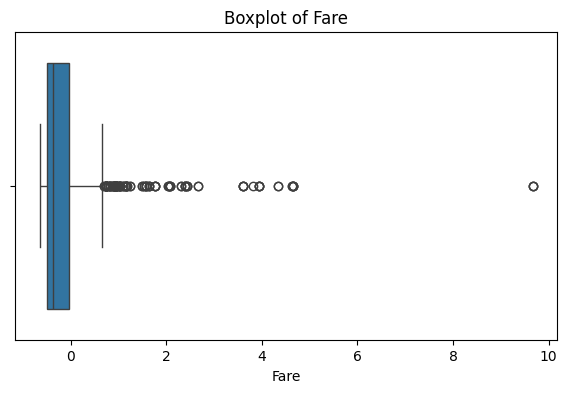

In [14]:
#visualize outliers
num_cols = ['Age', 'Fare']
import seaborn as sns
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [15]:
#Remove outliers using IQR method

def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Apply to numerical columns
for col in num_cols:
    df = remove_outliers(df, col)

Final Step :  Check the dataset and check if the data has been cleaned

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.565736,1,0,A/5 21171,-0.502445,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.258337,0,0,STON/O2. 3101282,-0.488854,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.433312,1,0,113803,0.420730,0,1
4,5,0,3,"Allen, Mr. William Henry",1,0.433312,0,0,373450,-0.486337,0,1
5,6,0,3,"Moran, Mr. James",1,-0.104637,0,0,330877,-0.478116,1,0


In [17]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


THE DATASET NOW HAS BEEN CLEANED AND PREPROCESSED FOR ML